<h2 style="font-size:24pt"> Proyecto DESI</h2>

<h2 style="font-size:24pt"> Julio 11, 2025</h2>

<p style="font-size:16pt">
Vsualization groups: filaments with real data, knots with real data, and voids with random data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
import pandas as pd
import re
from astropy.io import ascii
import networkx as nx
from sklearn.decomposition import PCA

## Filaments

In [2]:
filaments = {}
for j in range(10):
    file = f"filament_rosette/LRG_filament_rosette_0_random_{j}.ecsv"
    table = Table.read(file, format="ascii.ecsv")
    filaments[f'rosetta_0_random_{j}'] = table

In [3]:
data = "data_rosette/LRG_0_clustering_data.ecsv"
data_rosette0 = Table.read(data, format="ascii.ecsv")

In [4]:
data_rosette0 = data_rosette0[['TARGETID', 'x', 'y', 'z']]
data_rosette0_df = data_rosette0.to_pandas()

df_grupo_filament = {}  # aquí se almacenan todos los grupos

# Crear grafo de conexiones
G = nx.Graph()
df_filaments_df = filaments['rosetta_0_random_1'].to_pandas()

# Agregar aristas entre nodos conectados
edges = list(zip(df_filaments_df['TARGETID'], df_filaments_df['TARGETID_filament']))
G.add_edges_from(edges)

# Recorrer los nodos únicos
for i in set(df_filaments_df['TARGETID']):
    id_inicial = i

    if id_inicial in G:
        grupo = list(nx.node_connected_component(G, id_inicial))
        df_grupo = data_rosette0_df[data_rosette0_df['TARGETID'].isin(grupo)].copy()
        df_grupo['filament_id'] = id_inicial
        df_grupo_filament[id_inicial] = df_grupo
    else:
        print(f"El ID {id_inicial} no está en el grafo de conexiones.")

In [7]:
def alignment(df):
    if hasattr(df, 'to_pandas'):  # si es Table de Astropy
        df = df.to_pandas()
    coords = df[['x', 'y', 'z']].values.astype(float)  # fuerza conversión
    pca = PCA(n_components=3)
    coords_rotated = pca.fit_transform(coords)
    return coords_rotated

In [8]:
new_coord = alignment(data_rosette0)
data_rosette0_df[['x_rot', 'y_rot', 'z_rot']] = new_coord

In [9]:
filtrados = {}
for i in df_grupo_filament:   
    ids = df_grupo_filament[i]['TARGETID'].tolist()
    filtrados[i] = data_rosette0_df[data_rosette0_df['TARGETID'].isin(ids)].copy()

C:\Users\Sofia\AppData\Local\Temp\ipykernel_15616\856825842.py:15: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
c:\Users\Sofia\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


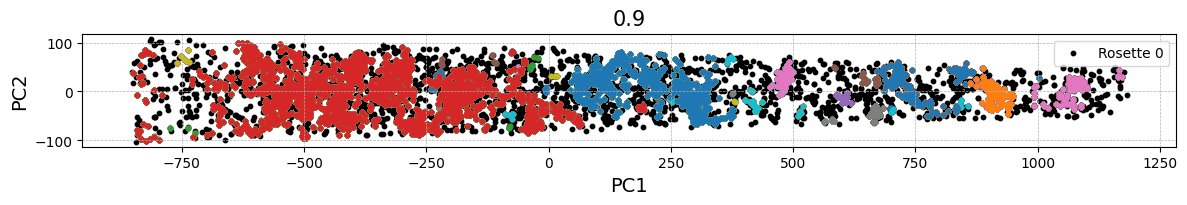

In [10]:
fig, ax = plt.subplots(figsize=(12, 10))

ax.scatter(new_coord[:, 0], new_coord[:, 1], c='k', s=10, label='Rosette 0')

for i in filtrados:
    ax.scatter(filtrados[i]['x_rot'], filtrados[i]['y_rot'], s=10)

ax.set_xlabel('PC1', fontsize=14)
ax.set_ylabel('PC2', fontsize=14)
ax.set_aspect('equal', adjustable='box')
ax.grid(True, linestyle='--', linewidth=0.5)
ax.legend()
ax.set_title('0.9', fontsize=15)

plt.tight_layout()

plt.show()

C:\Users\Sofia\AppData\Local\Temp\ipykernel_15616\1002470452.py:16: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


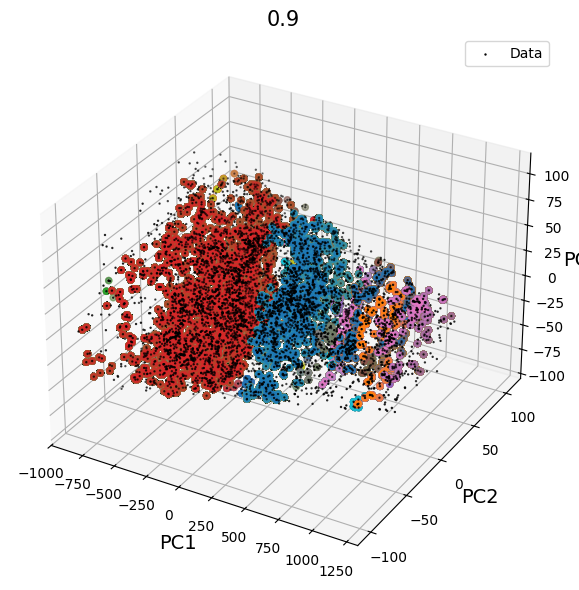

In [11]:
fig = plt.figure(figsize=(8, 6))    
ax = fig.add_subplot(111, projection='3d')

ax.scatter(new_coord[:, 0], new_coord[:, 1], new_coord[:, 2],
           c='k', s=0.5, label='Data')

for i in filtrados:
    ax.scatter(filtrados[i]['x_rot'], filtrados[i]['y_rot'], filtrados[i]['z_rot'], s=20)

ax.set_xlabel('PC1', size=14)
ax.set_ylabel('PC2', size=14)
ax.set_zlabel('PC3', size=14)
ax.set_title('0.9', fontsize=15)
ax.legend()

plt.tight_layout()
plt.show()

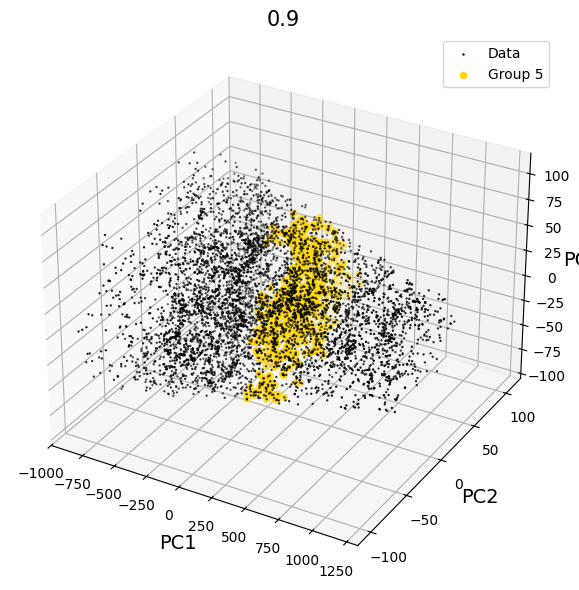

In [12]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(new_coord[:, 0], new_coord[:, 1], new_coord[:, 2],
           c='k', s=0.5, label='Data')

list_keys = list(filtrados.keys())
df_plot = filtrados[list_keys[5]]
ax.scatter(df_plot['x_rot'], df_plot['y_rot'], df_plot['z_rot'],s=20,color='gold',label='Group 5')

ax.set_xlabel('PC1', size=14)
ax.set_ylabel('PC2', size=14)
ax.set_zlabel('PC3', size=14)
ax.set_title('0.9', fontsize=15)
ax.legend()

plt.tight_layout()
plt.show()

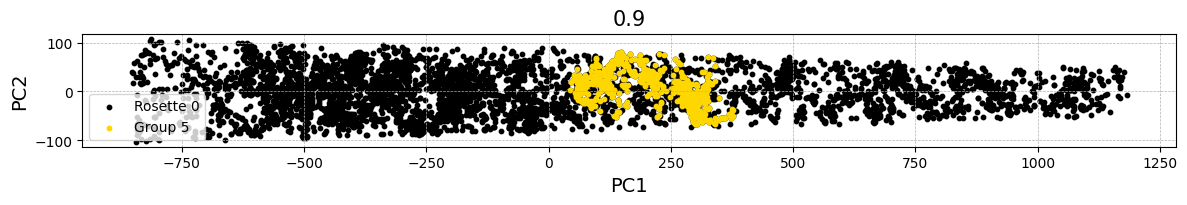

In [13]:
fig, ax = plt.subplots(figsize=(12, 10))

ax.scatter(new_coord[:, 0], new_coord[:, 1], c='k', s=10, label='Rosette 0')

list_keys = list(filtrados.keys())
df_plot = filtrados[list_keys[5]]
ax.scatter(df_plot['x_rot'], df_plot['y_rot'], s=10, c='gold', label='Group 5')

ax.set_xlabel('PC1', fontsize=14)
ax.set_ylabel('PC2', fontsize=14)
ax.set_aspect('equal', adjustable='box')
ax.grid(True, linestyle='--', linewidth=0.5)
ax.legend()
ax.set_title('0.9', fontsize=15)

plt.tight_layout()

plt.show()

## Void

In [31]:
void = {}
for j in range(10):
    file = f"void_rosette/LRG_void_rosette_0_random_{j}.ecsv"
    table = Table.read(file, format="ascii.ecsv")
    void[f'rosetta_0_random_{j}'] = table

In [ ]:
data_rosette0 = data_rosette0[['TARGETID', 'x', 'y', 'z']]
data_rosette0_df = data_rosette0.to_pandas()

df_grupo_void = {}  # aquí se almacenan todos los grupos
# Crear grafo de conexiones
G = nx.Graph()
df_void_df = void['rosetta_0_random_1'].to_pandas()

# Agregar aristas entre nodos conectados
edges = list(zip(df_void_df['TARGETID'], df_void_df['TARGETID_void']))
G.add_edges_from(edges)

# Recorrer los nodos únicos
for i in set(df_void_df['TARGETID']):
    id_inicial = i

    if id_inicial in G:
        grupo = list(nx.node_connected_component(G, id_inicial))
        df_grupo = data_rosette0_df[data_rosette0_df['TARGETID'].isin(grupo)].copy()
        df_grupo['void_id'] = id_inicial
        df_grupo_void[id_inicial] = df_grupo
    else:
        print(f"El ID {id_inicial} no está en el grafo de conexiones.")

In [16]:
new_coord = alignment(data_rosette0)
data_rosette0_df[['x_rot', 'y_rot', 'z_rot']] = new_coord

In [17]:
filtrados_void = {}
for i in df_grupo_void:   
    ids = df_grupo_void[i]['TARGETID'].tolist()
    filtrados_void[i] = data_rosette0_df[data_rosette0_df['TARGETID'].isin(ids)].copy()

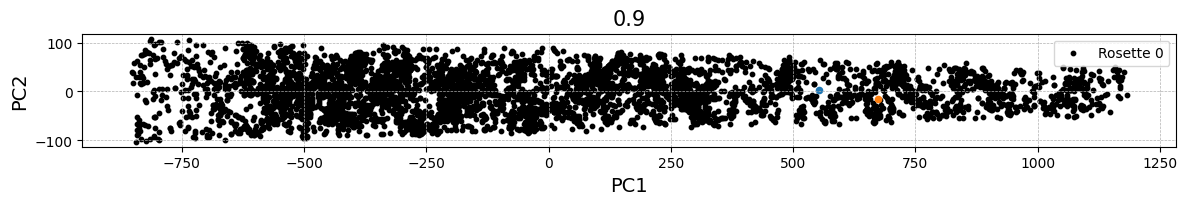

In [18]:
fig, ax = plt.subplots(figsize=(12, 10))

ax.scatter(new_coord[:, 0], new_coord[:, 1], c='k', s=10, label='Rosette 0')

for i in filtrados_void:
    ax.scatter(filtrados_void[i]['x_rot'], filtrados_void[i]['y_rot'], s=20)

ax.set_xlabel('PC1', fontsize=14)
ax.set_ylabel('PC2', fontsize=14)
ax.set_aspect('equal', adjustable='box')
ax.grid(True, linestyle='--', linewidth=0.5)
ax.legend()
ax.set_title('0.9', fontsize=15)

plt.tight_layout()

plt.show()

## Knot

In [19]:
knot = {}
for j in range(10):
    file = f"knot_rosette/LRG_knot_rosette_0_random_{j}.ecsv"
    table = Table.read(file, format="ascii.ecsv")
    knot[f'rosetta_0_random_{j}'] = table

In [20]:
data_rosette0 = data_rosette0[['TARGETID', 'x', 'y', 'z']]
data_rosette0_df = data_rosette0.to_pandas()

df_grupo_knot = {}  # aquí se almacenan todos los grupos
# Crear grafo de conexiones
G = nx.Graph()
df_knot_df = knot['rosetta_0_random_1'].to_pandas()

# Agregar aristas entre nodos conectados
edges = list(zip(df_knot_df['TARGETID'], df_knot_df['TARGETID_knot']))
G.add_edges_from(edges)

# Recorrer los nodos únicos
for i in set(df_knot_df['TARGETID']):
    id_inicial = i

    if id_inicial in G:
        grupo = list(nx.node_connected_component(G, id_inicial))
        df_grupo = data_rosette0_df[data_rosette0_df['TARGETID'].isin(grupo)].copy()
        df_grupo['knot_id'] = id_inicial
        df_grupo_knot[id_inicial] = df_grupo
    else:
        print(f"El ID {id_inicial} no está en el grafo de conexiones.")

In [21]:
new_coord = alignment(data_rosette0)
data_rosette0_df[['x_rot', 'y_rot', 'z_rot']] = new_coord

In [22]:
filtrados_knot = {}
for i in df_grupo_knot:   
    ids = df_grupo_knot[i]['TARGETID'].tolist()
    filtrados_knot[i] = data_rosette0_df[data_rosette0_df['TARGETID'].isin(ids)].copy()

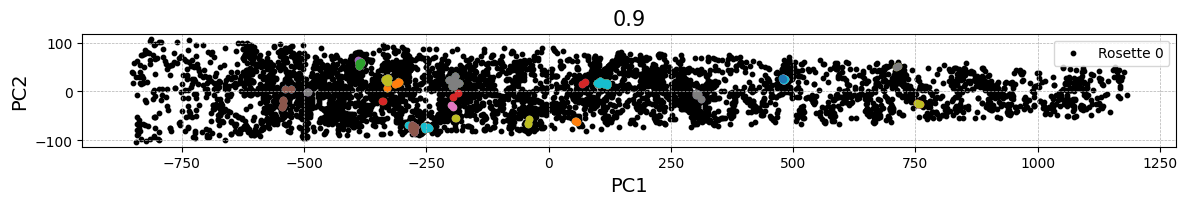

In [23]:
fig, ax = plt.subplots(figsize=(12, 10))

ax.scatter(new_coord[:, 0], new_coord[:, 1], c='k', s=10, label='Rosette 0')

for i in filtrados_knot:
    ax.scatter(filtrados_knot[i]['x_rot'], filtrados_knot[i]['y_rot'], s=20)

ax.set_xlabel('PC1', fontsize=14)
ax.set_ylabel('PC2', fontsize=14)
ax.set_aspect('equal', adjustable='box')
ax.grid(True, linestyle='--', linewidth=0.5)
ax.legend()
ax.set_title('0.9', fontsize=15)

plt.tight_layout()

plt.show()

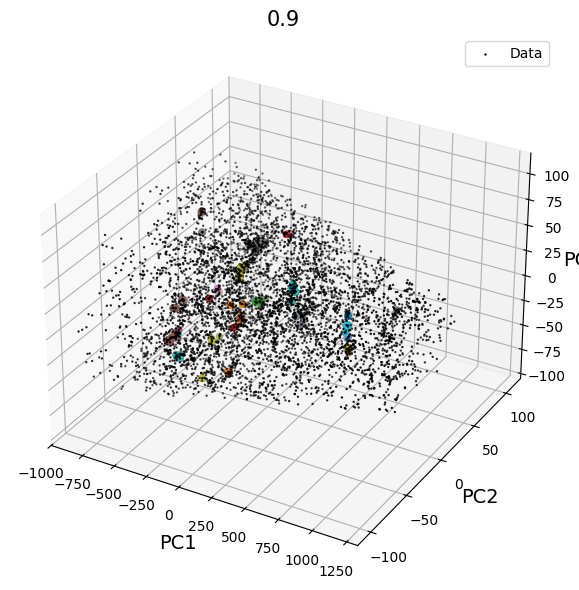

In [24]:
fig = plt.figure(figsize=(8, 6))    
ax = fig.add_subplot(111, projection='3d')

ax.scatter(new_coord[:, 0], new_coord[:, 1], new_coord[:, 2],
           c='k', s=0.5, label='Data')

for i in filtrados_knot:
    ax.scatter(filtrados_knot[i]['x_rot'], filtrados_knot[i]['y_rot'], filtrados_knot[i]['z_rot'], s=20)

ax.set_xlabel('PC1', size=14)
ax.set_ylabel('PC2', size=14)
ax.set_zlabel('PC3', size=14)
ax.set_title('0.9', fontsize=15)
ax.legend()

plt.tight_layout()
plt.show()

## All classification

C:\Users\Sofia\AppData\Local\Temp\ipykernel_15616\3737330425.py:30: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
c:\Users\Sofia\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


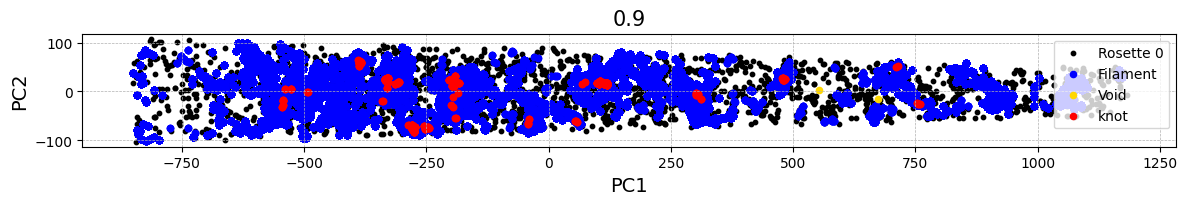

In [25]:
fig, ax = plt.subplots(figsize=(12, 10))

ax.scatter(new_coord[:, 0], new_coord[:, 1], c='k', s=10, label='Rosette 0')

first = True
for i in filtrados:
    ax.scatter(filtrados[i]['x_rot'], filtrados[i]['y_rot'], s=20,
               c='blue', label='Filament' if first else "")
    first = False

first = True
for i in filtrados_void:
    ax.scatter(filtrados_void[i]['x_rot'], filtrados_void[i]['y_rot'], s=20,
               color='gold', label='Void' if first else "")
    first = False

first = True
for i in filtrados_knot:
    ax.scatter(filtrados_knot[i]['x_rot'], filtrados_knot[i]['y_rot'], s=20,
               color='red', label='knot' if first else "")
    first = False

ax.set_xlabel('PC1', fontsize=14)
ax.set_ylabel('PC2', fontsize=14)
ax.set_aspect('equal', adjustable='box')
ax.grid(True, linestyle='--', linewidth=0.5)
ax.legend()
ax.set_title('0.9', fontsize=15)

plt.tight_layout()
plt.show()


C:\Users\Sofia\AppData\Local\Temp\ipykernel_15616\3540523342.py:35: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


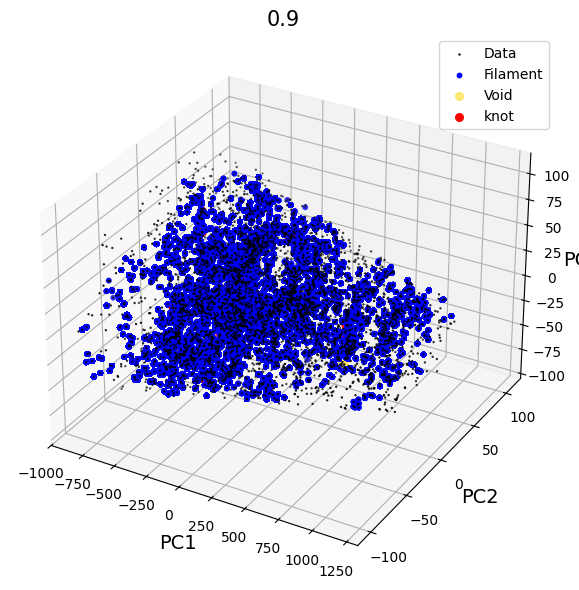

In [26]:
fig = plt.figure(figsize=(8, 6))    
ax = fig.add_subplot(111, projection='3d')

# Datos base
ax.scatter(new_coord[:, 0], new_coord[:, 1], new_coord[:, 2],
           c='k', s=0.5, label='Data')

# Filament
first = True
for i in filtrados:
    ax.scatter(filtrados[i]['x_rot'], filtrados[i]['y_rot'], filtrados[i]['z_rot'],
               s=10, c='blue', label='Filament' if first else "")
    first = False

# Void
first = True
for i in filtrados_void:
    ax.scatter(filtrados_void[i]['x_rot'], filtrados_void[i]['y_rot'], filtrados_void[i]['z_rot'],
               s=30, color='gold', label='Void' if first else "",alpha=0.5)
    first = False

# Knot
first = True
for i in filtrados_knot:
    ax.scatter(filtrados_knot[i]['x_rot'], filtrados_knot[i]['y_rot'], filtrados_knot[i]['z_rot'],
               s=30, color='red', label='knot' if first else "")
    first = False

ax.set_xlabel('PC1', size=14)
ax.set_ylabel('PC2', size=14)
ax.set_zlabel('PC3', size=14)
ax.set_title('0.9', fontsize=15)
ax.legend()

plt.tight_layout()
plt.show()
